**Nama:** Basthian Arisna

**NIM:** F55120060

Link GColabs: https://colab.research.google.com/drive/11EczUzPnP_bfsce2B1oY0SDyw-YK7pty#scrollTo=WPa6mfRhn1Tb

## Import Library
Impor library yang dibutuhkan

In [1]:
from google.colab import drive
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np

Link dataset: https://drive.google.com/drive/folders/1fgJCBlFFwQBzeeRZ-Kq15HDZX3QhFIes?usp=share_link

## Koneksi ke Google Drive

In [2]:
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [3]:
%cd gdrive/MyDrive/Dataset\ Deep \Learning/Database \Jeruk

/content/gdrive/MyDrive/Dataset Deep Learning/Database Jeruk


In [4]:
%ls

Data-Prediksi/  Data-Testing/  Data-Training/


## Menyiapkan data training dan data testing

In [5]:
training_data = "Data-Training"
testing_data = "Data-Testing"

In [6]:
IMAGE_SIZE = 224

In [7]:
# Membuat image generator untuk me-load dan split data train dan data validasi
train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=5,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=True,
        fill_mode="nearest",
        validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
        training_data,
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        class_mode="categorical",
        subset="training"
)

validation_generator = train_datagen.flow_from_directory(
        training_data,
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        class_mode="categorical",
        subset="validation"
)

test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        testing_data,
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        class_mode="categorical",
)

Found 250 images belonging to 2 classes.
Found 62 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [8]:
# Melihat label kelas data dataset
class_names = list(train_generator.class_indices.keys())
class_names

['matang', 'mentah']

## Membuat model VGG16

In [9]:
# Membangun arsitekstur VGG16
vgg16_model = Sequential()

vgg16_model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(224, 224, 3)))
vgg16_model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
vgg16_model.add(MaxPooling2D((2, 2), strides=(2, 2)))

vgg16_model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
vgg16_model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
vgg16_model.add(MaxPooling2D((2, 2), strides=(2, 2)))

vgg16_model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
vgg16_model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
vgg16_model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
vgg16_model.add(MaxPooling2D((2, 2), strides=(2, 2)))

vgg16_model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
vgg16_model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
vgg16_model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
vgg16_model.add(MaxPooling2D((2, 2), strides=(2, 2)))

vgg16_model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
vgg16_model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
vgg16_model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
vgg16_model.add(MaxPooling2D((2, 2), strides=(2, 2)))

vgg16_model.add(Flatten())

vgg16_model.add(Dense(4096, activation='relu'))
vgg16_model.add(Dense(4096, activation='relu'))
vgg16_model.add(Dense(2, activation='sigmoid'))

In [10]:
# Kompilasi model VGG16
vgg16_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
vgg16_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                    

## Training Model

In [12]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint_callback = ModelCheckpoint(
    filepath='best_model.h5',
    save_weights_only=False,
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
    )

In [14]:
history = vgg16_model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10,
    batch_size= 32,
    shuffle= True,
    callbacks=[checkpoint_callback])

Epoch 1/10
8/8 [==============================] - 73s 7s/step - loss: 0.9419 - accuracy: 0.5240 - val_loss: 0.6934 - val_accuracy: 0.5000
Epoch 2/10
8/8 [==============================] - 38s 5s/step - loss: 0.6939 - accuracy: 0.5000 - val_loss: 0.6935 - val_accuracy: 0.5000
Epoch 3/10
8/8 [==============================] - 39s 5s/step - loss: 0.6936 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/10
8/8 [==============================] - 33s 4s/step - loss: 0.6942 - accuracy: 0.4920 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/10
8/8 [==============================] - 35s 4s/step - loss: 0.6932 - accuracy: 0.4920 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 6/10
8/8 [==============================] - 32s 4s/step - loss: 0.7015 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 7/10
8/8 [==============================] - 32s 4s/step - loss: 0.6932 - accuracy: 0.4840 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 8/10
8/8 [==================

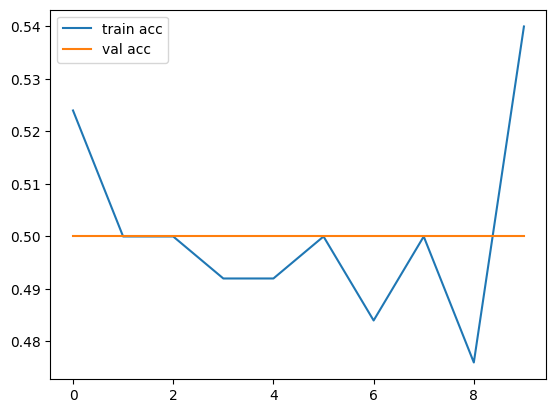

In [15]:
# Accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

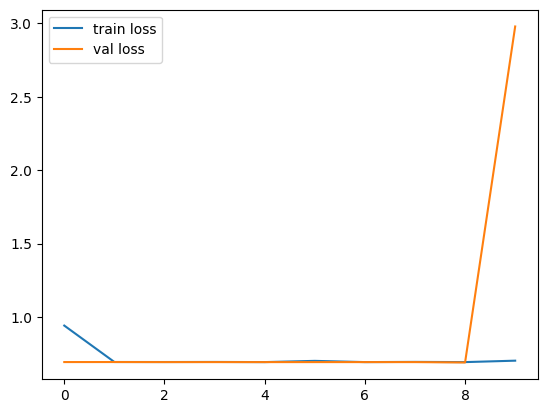

In [16]:
# Loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()

## Evaluasi Model

In [17]:
test_loss, test_accuracy = vgg16_model.evaluate(test_generator)

print("\nTest Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

4/4 [==============================] - 4s 1s/step - loss: 2.9445 - accuracy: 0.5000

Test Loss: 2.9445176124572754
Test Accuracy: 0.5


## Prediksi Gambar

In [18]:
predict_data = "Data-Prediksi/"
predict_gen = ImageDataGenerator(rescale=1./255).flow_from_directory(
    predict_data,
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    class_mode="categorical",
)

Found 6 images belonging to 2 classes.


In [19]:
def predict(model, img):
    #img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img, 0)
    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions)]
    confidence = round(100 * (np.max(predictions)), 1)
    return predicted_class, confidence

1/1 [==============================] - 0s 94ms/step


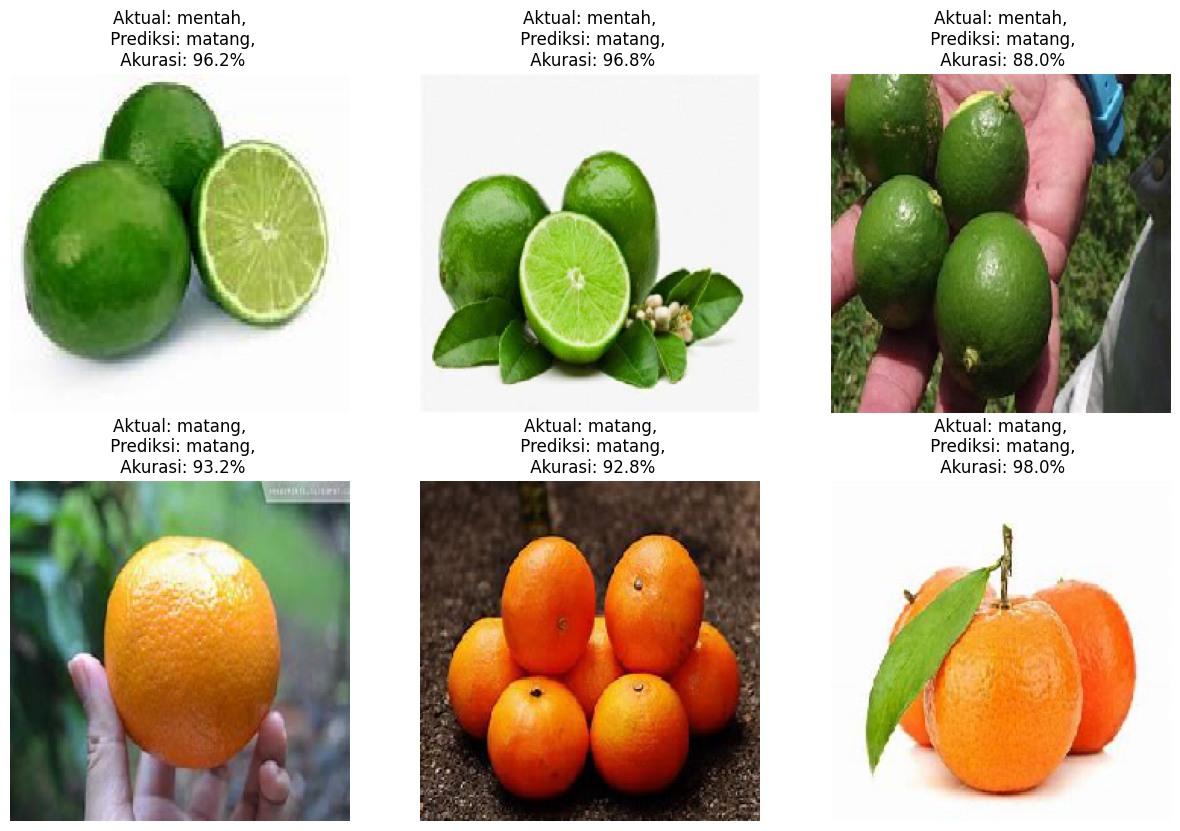

In [20]:
plt.figure(figsize=(15, 15))

for images, labels in predict_gen:
    for i in range(6):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        predicted_class, confidence = predict(vgg16_model, images[i])
        actual_class = class_names[int(labels[i][1])] 
        plt.title(f"Aktual: {actual_class},\n Prediksi: {predicted_class},\n Akurasi: {confidence}%")
        plt.axis("off")
    break